In [1398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as SM
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [1399]:
df = pd.read_excel('/content/drive/MyDrive/great learning/CompData-1.xlsx')

In [1400]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [1401]:
df.columns

Index(['Co_Code', 'Co_Name', '_Operating_Expense_Rate',
       '_Research_and_development_expense_rate', '_Cash_flow_rate',
       '_Interest_bearing_debt_interest_rate', '_Tax_rate_A',
       '_Cash_Flow_Per_Share', '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_pers

In [1402]:
df.shape

(2058, 58)

In [1403]:
df.drop('Co_Name',axis=1,inplace=True)

In [1404]:
df.shape

(2058, 57)

# Null Values treatment

In [1405]:
df = df.replace(to_replace=r'^\D+$', value=0, regex=True)

In [1406]:
col=list(df)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df= pd.DataFrame(imputer.fit_transform(df))
df.columns=col
df.head()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974.0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,...,0.310901,0.034913,0.0,0.028801,0.620927,0.026930,0.565744,1.0,0.015338,0.0
1,21214.0,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,...,0.314572,0.041653,0.0,0.006191,0.622513,0.026297,0.560741,1.0,0.029445,1.0
2,14852.0,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,...,0.314777,0.033560,0.0,0.001095,0.623749,0.027276,0.566744,1.0,0.041718,0.0
3,2439.0,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,...,0.316974,0.016527,0.0,0.003749,0.622963,0.026988,0.565950,1.0,0.026956,0.0
4,23505.0,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,...,0.317729,0.034497,0.0,0.006595,0.624419,0.027498,0.567177,1.0,0.019900,0.0


# Outliers Treatment

In [1407]:
def detect_outlier(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    up_lim = q3 + (1.5 * iqr)
    lr_lim = q1 - (1.5 * iqr)
    return lr_lim,up_lim

In [1408]:
length = df.columns.drop(['Co_Code','Default','_Liability_Assets_Flag'])

for i in length:
#     print(df[i])
    lr,ur = detect_outlier(df[i])
    df[i] = np.where(df[i] > ur,ur,df[i])
    df[i] = np.where(df[i] < lr,lr,df[i])



# Training the data

In [1409]:
X=df.drop('Default',axis=1)

In [1410]:
y=df[['Default']]

In [1411]:
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# Important features

In [1412]:
from sklearn.tree import DecisionTreeClassifier
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [1413]:
f_I=pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns)
f_I.sort_values(by='Imp',ascending=False)

,Imp
_Net_Value_Growth_Rate,0.551350
_Degree_of_Financial_Leverage_DFL,0.128874
_Total_income_to_Total_expense,0.106131
_Net_profit_before_tax_to_Paid_in_capital,0.092488
_Equity_to_Liability,0.043868
_Interest_Coverage_Ratio_Interest_expense_to_EBIT,0.043845
_No_credit_Interval,0.033446
_Current_Asset_Turnover_Rate,0.000000
_Quick_Assets_to_Current_Liability,0.000000
_Cash_to_Current_Liability,0.000000


In [1414]:
imp_features_dt = df[['_Net_Value_Growth_Rate','_Degree_of_Financial_Leverage_DFL','_Total_income_to_Total_expense','_Net_profit_before_tax_to_Paid_in_capital','_Equity_to_Liability','_Interest_Coverage_Ratio_Interest_expense_to_EBIT','_No_credit_Interval']]

# Logistic Regression Model

In [1415]:
logit_model1 = SM.Logit(endog = df['Default'],exog =imp_features_dt ).fit_regularized(method='l1', alpha=0.00)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.21834581549161647
            Iterations: 47
            Function evaluations: 48
            Gradient evaluations: 47


In [1416]:
logit_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2051
Method:                           MLE   Df Model:                            6
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  0.3578
Time:                        13:47:07   Log-Likelihood:                -449.36
converged:                       True   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                6.048e-105
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
_Net_Value_Growth_Rate                               -0.3215   2107.974     -0.000      1.000   -4131.875    4131.232
_Degree_of_Financial_Leverage_DFL                    -0.8734    386.350     -0.002      0.998    -758.105     756.358
_Total_income_to_Total_expense                       -1.2465    938.905     -0.001      0.999   -1841.466    1838.973
_Net_profit_before_tax_to_Paid_in_capital           -91.1912     12.268     -7.433      0.000    -115.236     -67.146
_Equity_to_Liability                                -67.7994      9.555     -7.096      0.000     -86.527     -49.072
_Interest_Coverage_Ratio_Interest_expense_to_EBIT    10.7195     79.231      0.135      0.892    -144.571     166.010
_No_credit_Interval                                  14.1667     61.989      0.229      0.819    -107.329     135.662
=====================================================================================================================
"""

In [1417]:
X_train=X_train[['_Net_Value_Growth_Rate','_Degree_of_Financial_Leverage_DFL','_Total_income_to_Total_expense','_Net_profit_before_tax_to_Paid_in_capital','_Equity_to_Liability','_Interest_Coverage_Ratio_Interest_expense_to_EBIT','_No_credit_Interval']]
y_predict_train = logit_model1.predict(X_train)
y_predict_train

631     0.075847
1799    0.000936
1924    0.004612
1629    0.011101
363     0.002298
          ...   
1638    0.761617
1095    0.001254
1130    0.137043
1294    0.024859
860     0.000745
Length: 1378, dtype: float64

In [1418]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [1419]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.982     0.704     0.820      1225
         1.0      0.274     0.895     0.420       153

    accuracy                          0.725      1378
   macro avg      0.628     0.800     0.620      1378
weighted avg      0.903     0.725     0.775      1378



In [1420]:
X_test=X_test[['_Net_Value_Growth_Rate','_Degree_of_Financial_Leverage_DFL','_Total_income_to_Total_expense','_Net_profit_before_tax_to_Paid_in_capital','_Equity_to_Liability','_Interest_Coverage_Ratio_Interest_expense_to_EBIT','_No_credit_Interval']]
y_predict_test = logit_model1.predict(X_test)
y_predict_test

1298    0.051189
591     0.003273
1318    0.022842
1067    0.015704
29      0.064024
          ...   
952     0.047043
208     0.019463
1433    0.004669
1612    0.041903
58      0.083240
Length: 680, dtype: float64

In [1421]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [1422]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.987     0.729     0.839       613
         1.0      0.269     0.910     0.415        67

    accuracy                          0.747       680
   macro avg      0.628     0.820     0.627       680
weighted avg      0.916     0.747     0.797       680



## Applying SMOTE to data

In [1423]:
from imblearn.over_sampling import SMOTE

In [1424]:
smote = SMOTE()
# X=[['_Degree_of_Financial_Leverage_DFL','_Total_income_to_Total_expense','_Net_profit_before_tax_to_Paid_in_capital','_Equity_to_Liability','_No_credit_Interval']]
X_resampled, y_resampled = smote.fit_resample(X, y)


In [1425]:
print(X_resampled.shape)
print(y_resampled.shape)

(3676, 56)
(3676, 1)


In [1426]:
logit_model2 = SM.Logit(endog = y_resampled,exog =X_resampled ).fit_regularized(method='l1', alpha=0.1)

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 0.6931471805599453
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 50 out of 56 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1427]:
logit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 3676
Model:                          Logit   Df Residuals:                     3620
Method:                           MLE   Df Model:                           55
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                   0.000
Time:                        13:47:07   Log-Likelihood:                -2548.0
converged:                      False   LL-Null:                       -2548.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Co_Code                                                    0   1.64e-06          0      1.000   -3.22e-06    3.22e-06
_Operating_Expense_Rate                                    0   1.22e-11          0      1.000   -2.39e-11    2.39e-11
_Research_and_development_expense_rate                     0   2.59e-11          0      1.000   -5.08e-11    5.08e-11
_Cash_flow_rate                                            0     20.442          0      1.000     -40.066      40.066
_Interest_bearing_debt_interest_rate                       0    140.058          0      1.000    -274.508     274.508
_Tax_rate_A                                                0      0.364          0      1.000      -0.713       0.713
_Cash_Flow_Per_Share                                       0     10.370          0      1.000     -20.324      20.324
_Per_Share_Net_profit_before_tax_Yuan_                     0     20.634          0      1.000     -40.441      40.441
_Realized_Sales_Gross_Profit_Growth_Rate                   0    590.718          0      1.000   -1157.786    1157.786
_Operating_Profit_Growth_Rate                              0    445.504          0      1.000    -873.172     873.172
_Continuous_Net_Profit_Growth_Rate                         0   1422.295          0      1.000   -2787.646    2787.646
_Total_Asset_Growth_Rate                                   0   1.42e-11          0      1.000   -2.78e-11    2.78e-11
_Net_Value_Growth_Rate                                     0   1069.814          0      1.000   -2096.797    2096.797
_Total_Asset_Return_Growth_Rate_Ratio                      0    106.721          0      1.000    -209.169     209.169
_Cash_Reinvestment_perc                                    0      8.286          0      1.000     -16.241      16.241
_Current_Ratio                                             0     25.455          0      1.000     -49.891      49.891
_Quick_Ratio                                               0     23.970          0      1.000     -46.980      46.980
_Interest_Expense_Ratio                                    0     60.353          0      1.000    -118.289     118.289
_Total_debt_to_Total_net_worth                             0     10.228          0      1.000     -20.047      20.047
_Long_term_fund_suitability_ratio_A                        0     53.901          0      1.000    -105.645     105.645
_Net_profit_before_tax_to_Paid_in_capital                  0     21.661          0      1.000     -42.455      42.455
_Total_Asset_Turnover                                      0      1.506          0      1.000      -2.951       2.951
_Accounts_Receivable_Turnover                              0     59.748          0      1.000    -117.103     117.103
_Average_Collection_Days                                   0     14.316          0      1.000     -28.059      28.059
_Inventory_Turnover_Rate_times                         

## Final model

Balanced the data using SMOTE and founf important features using Decision Tress model built with Logistic Regression


In [1428]:
X1=df.drop('Default',axis=1)
y1=df[['Default']]
X_resampled1, y_resampled1 = smote.fit_resample(X1, y1)
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_resampled1, y_resampled1,test_size=0.33,random_state=42)

In [1429]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(X_train1, y_train1)
print(dTreeR.score(X_train1, y_train1))
print(dTreeR.score(X_test1, y_test1))

0.9228269699431356
0.8797364085667215


In [1430]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

f_I=pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train1.columns)
f_I.sort_values(by='Imp',ascending=False)



,Imp
_Retained_Earnings_to_Total_Assets,0.587529
_Total_debt_to_Total_net_worth,0.127415
_Net_profit_before_tax_to_Paid_in_capital,0.047370
_Inventory_to_Working_Capital,0.039172
_Average_Collection_Days,0.026974
_Operating_Profit_Growth_Rate,0.021790
_Continuous_Net_Profit_Growth_Rate,0.020373
_Long_term_fund_suitability_ratio_A,0.016578
_Allocation_rate_per_person,0.016411
_Quick_Assets_to_Total_Assets,0.015722


In [1431]:
new_feature = f_I[f_I['Imp'] > 0.01].T.columns

print(new_feature)

Index(['_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Net_Value_Growth_Rate', '_Total_debt_to_Total_net_worth',
       '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Average_Collection_Days',
       '_Allocation_rate_per_person', '_Quick_Assets_to_Total_Assets',
       '_Inventory_to_Working_Capital', '_Retained_Earnings_to_Total_Assets',
       '_Current_Asset_Turnover_Rate', '_Fixed_Assets_to_Assets'],
      dtype='object')


_Cash_flow_rate', '_Operating_Profit_Growth_Rate',
       '_Continuous_Net_Profit_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_debt_to_Total_net_worth',
       '_Net_profit_before_tax_to_Paid_in_capital',
       '_Accounts_Receivable_Turnover', '_Allocation_rate_per_person',
       '_Cash_to_Current_Liability', '_Inventory_to_Working_Capital',
       '_Retained_Earnings_to_Total_Assets', '_Cash_Flow_to_Equity',
       '_Total_assets_to_GNP_price', '_Degree_of_Financial_Leverage_DFL

In [1432]:
# exog1 = X_resampled1[['_Total_debt_to_Total_net_worth','_Inventory_to_Working_Capital','_Retained_Earnings_to_Total_Assets','_Net_profit_before_tax_to_Paid_in_capital','_Long_term_Liability_to_Current_Assets','_Cash_Turnover_Rate','_Quick_Assets_to_Total_Assets','_Cash_Flow_Per_Share','_Inventory_Turnover_Rate_times','_Total_income_to_Total_expense','_Average_Collection_Days','_Quick_Asset_Turnover_Rate','']]
# new_feature = new_feature.drop('_Operating_Expense_Rate')
logit_model3 = SM.Logit(endog = y_resampled1['Default'],exog=X_resampled1[new_feature],random_state=42).fit()


         Current function value: 18.679389
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1433]:
logit_model3.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 3676
Model:                          Logit   Df Residuals:                     3663
Method:                           MLE   Df Model:                           12
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  -25.95
Time:                        13:47:08   Log-Likelihood:                -68665.
converged:                      False   LL-Null:                       -2548.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
_Operating_Profit_Growth_Rate             -4.542e+05   8.45e+04     -5.375      0.000    -6.2e+05   -2.89e+05
_Continuous_Net_Profit_Growth_Rate         1.801e+06   3.35e+05      5.375      0.000    1.14e+06    2.46e+06
_Net_Value_Growth_Rate                      1.79e+06   3.32e+05      5.391      0.000    1.14e+06    2.44e+06
_Total_debt_to_Total_net_worth             8179.8153   1516.722      5.393      0.000    5207.094    1.12e+04
_Long_term_fund_suitability_ratio_A        7505.5504   1435.256      5.229      0.000    4692.500    1.03e+04
_Net_profit_before_tax_to_Paid_in_capital -8881.4907   1644.933     -5.399      0.000   -1.21e+04   -5657.481
_Average_Collection_Days                   5762.9104   1063.295      5.420      0.000    3678.891    7846.930
_Allocation_rate_per_person                 965.7993    178.463      5.412      0.000     616.019    1315.579
_Quick_Assets_to_Total_Assets              -148.1634     27.539     -5.380      0.000    -202.139     -94.188
_Inventory_to_Working_Capital             -1.504e+04   2858.894     -5.259      0.000   -2.06e+04   -9432.346
_Retained_Earnings_to_Total_Assets        -2176.5823    406.431     -5.355      0.000   -2973.173   -1379.992
_Current_Asset_Turnover_Rate               3640.3702    762.811      4.772      0.000    2145.288    5135.452
_Fixed_Assets_to_Assets                     -40.0540      8.054     -4.973      0.000     -55.840     -24.268
=============================================================================================================

Possibly complete quasi-separation: A fraction 0.76 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1434]:
X_train=X_train1[new_feature]
y_predict_train = logit_model3.predict(X_train)
y_predict_train

123      1.012614e-76
1882     4.345523e-62
3530     1.000000e+00
819      9.349444e-94
100     9.940291e-120
            ...      
1130     2.282918e-38
1294     3.501794e-84
860     1.008642e-182
3507     1.000000e+00
3174     1.000000e+00
Length: 2462, dtype: float64

In [1435]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [1436]:
len(y_class_pred)

2462

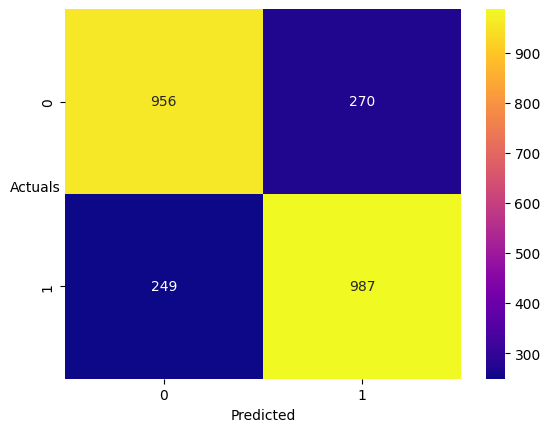

In [1437]:
sns.heatmap((metrics.confusion_matrix(y_train1,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1438]:
print(metrics.classification_report(y_train1,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.793     0.780     0.787      1226
         1.0      0.785     0.799     0.792      1236

    accuracy                          0.789      2462
   macro avg      0.789     0.789     0.789      2462
weighted avg      0.789     0.789     0.789      2462



In [1439]:
X_test=X_test1[new_feature]
y_predict_test = logit_model3.predict(X_test)
y_predict_test

3045     1.000000e+00
1744     1.000000e+00
3316     1.000000e+00
2755     9.999994e-01
1691     9.999977e-01
            ...      
518     1.987951e-132
1820     4.138503e-52
767     2.721552e-128
2940     1.000000e+00
421      3.055431e-42
Length: 1214, dtype: float64

In [1440]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

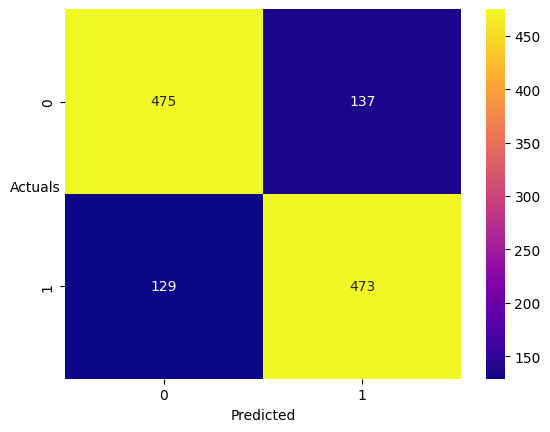

In [1441]:
sns.heatmap((metrics.confusion_matrix(y_test1,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1442]:
print(metrics.classification_report(y_test1,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.786     0.776     0.781       612
         1.0      0.775     0.786     0.781       602

    accuracy                          0.781      1214
   macro avg      0.781     0.781     0.781      1214
weighted avg      0.781     0.781     0.781      1214



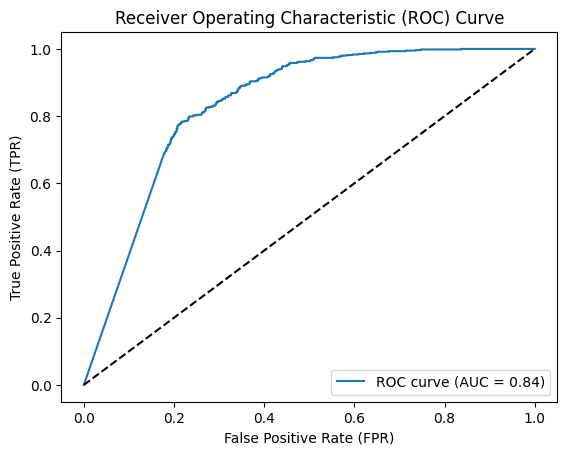

In [1443]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test1, y_predict_test)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



# Random Forest

The below code is with the important features

<ipython-input-1444-1c52b3e3f59e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled1, y_resampled1)


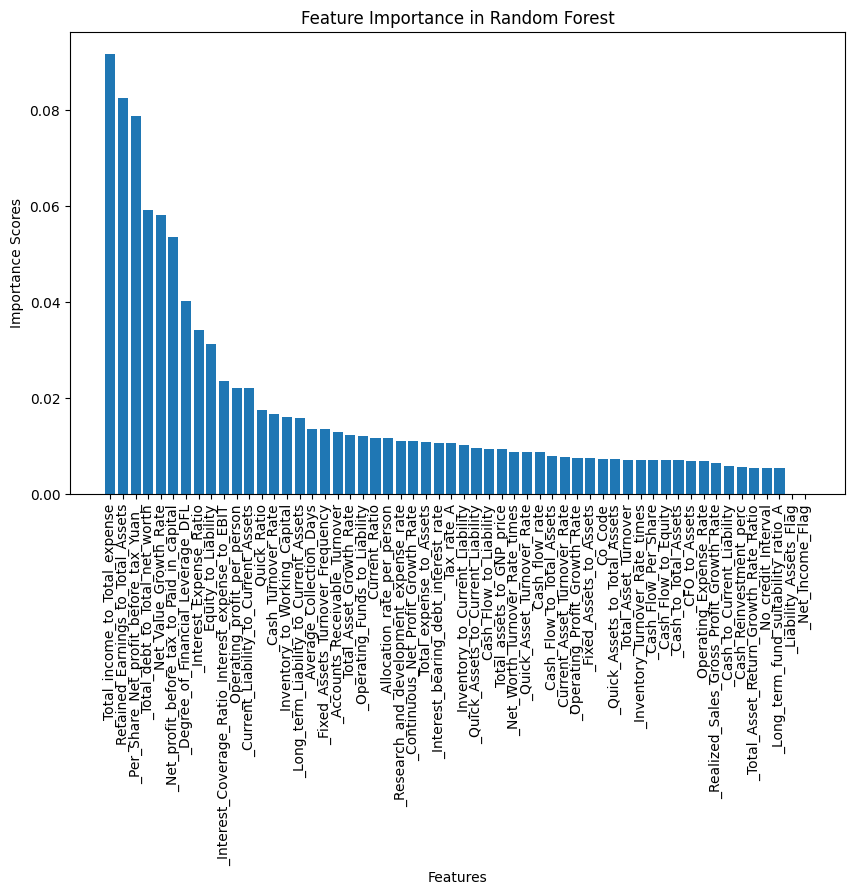

In [1444]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_resampled1, y_resampled1)

# 2. Access Feature Importance Scores
feature_importance = model.feature_importances_

# 3. Sort and Rank the Features
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [X_resampled1.columns[i] for i in sorted_indices]

# 4. Visualize the Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices])
plt.xticks(range(len(feature_importance)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance in Random Forest')
plt.show()


In [1445]:
feeatures = pd.DataFrame(feature_importance, columns = ["Imp"], index = X_resampled1.columns)

In [1446]:
feeatures.sort_values(by='Imp',ascending=False)

,Imp
_Total_income_to_Total_expense,0.091592
_Retained_Earnings_to_Total_Assets,0.082399
_Per_Share_Net_profit_before_tax_Yuan_,0.078726
_Total_debt_to_Total_net_worth,0.059110
_Net_Value_Growth_Rate,0.058146
_Net_profit_before_tax_to_Paid_in_capital,0.053543
_Degree_of_Financial_Leverage_DFL,0.040200
_Interest_Expense_Ratio,0.034271
_Equity_to_Liability,0.031373
_Interest_Coverage_Ratio_Interest_expense_to_EBIT,0.023581


In [1447]:
col= feeatures.T.columns
select = []
for i in range(len(feeatures)):
  if feeatures['Imp'][i] > 0.025:
    select.append(col[i])


In [1448]:
select

['_Per_Share_Net_profit_before_tax_Yuan_',
 '_Net_Value_Growth_Rate',
 '_Interest_Expense_Ratio',
 '_Total_debt_to_Total_net_worth',
 '_Net_profit_before_tax_to_Paid_in_capital',
 '_Retained_Earnings_to_Total_Assets',
 '_Total_income_to_Total_expense',
 '_Degree_of_Financial_Leverage_DFL',
 '_Equity_to_Liability']

In [1449]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=42)
model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred = model.predict(X_test1)
y_train_pred = model.predict(X_train1)
# Calculate the accuracy of the model
accuracy1 = accuracy_score(y_train1,y_train_pred )
accuracy2 = accuracy_score(y_test1, y_pred)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)

<ipython-input-1449-6fe218fc00a5>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train1, y_train1)


Accuracy1: 1.0
Accuracy2: 0.9522240527182867


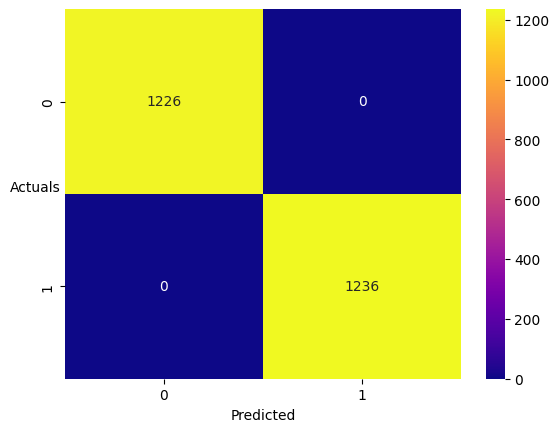

In [1450]:
sns.heatmap((metrics.confusion_matrix(y_train1,y_train_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1451]:
print(metrics.classification_report(y_train1, y_train_pred,digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000      1226
         1.0      1.000     1.000     1.000      1236

    accuracy                          1.000      2462
   macro avg      1.000     1.000     1.000      2462
weighted avg      1.000     1.000     1.000      2462



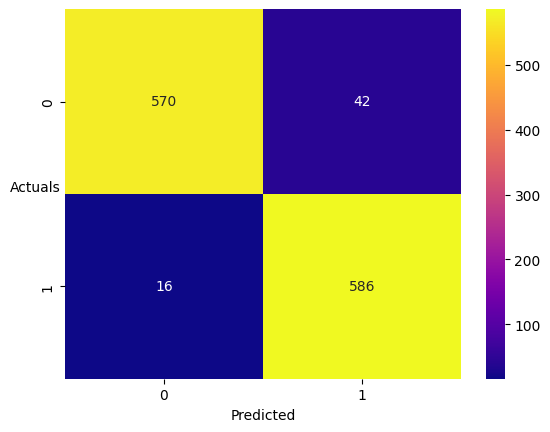

In [1452]:
sns.heatmap((metrics.confusion_matrix(y_test1,y_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1453]:
print(metrics.classification_report(y_test1, y_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.973     0.931     0.952       612
         1.0      0.933     0.973     0.953       602

    accuracy                          0.952      1214
   macro avg      0.953     0.952     0.952      1214
weighted avg      0.953     0.952     0.952      1214



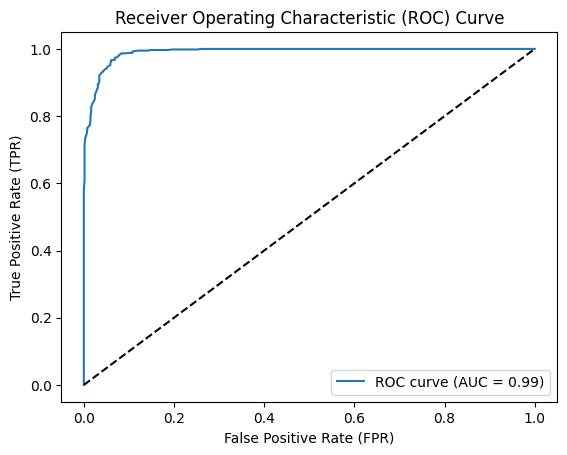

In [1454]:
from sklearn.metrics import roc_curve, auc

y_scores =model.predict_proba(X_test1)[:, 1]  # Assuming the positive class is at index 1

fpr, tpr, thresholds = roc_curve(y_test1, y_scores)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



# Linear Discriminate Analysis

In [1458]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

X_train_lda = lda.transform(X_train)

X_test_lda = lda.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1459]:
y_pred = lda.predict(X_train)


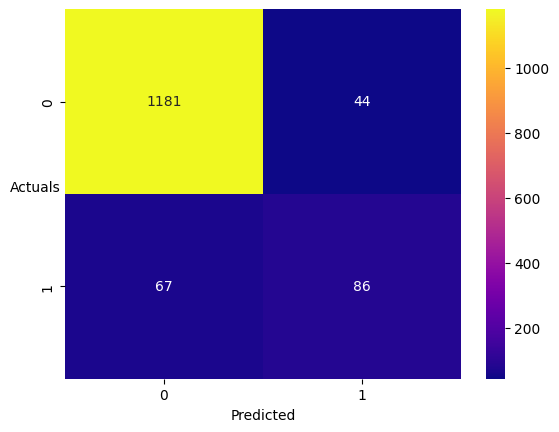

In [1460]:
sns.heatmap((metrics.confusion_matrix(y_train,y_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1461]:
print(metrics.classification_report(y_train, y_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.946     0.964     0.955      1225
         1.0      0.662     0.562     0.608       153

    accuracy                          0.919      1378
   macro avg      0.804     0.763     0.781      1378
weighted avg      0.915     0.919     0.917      1378



In [1462]:
y_pred = lda.predict(X_test)


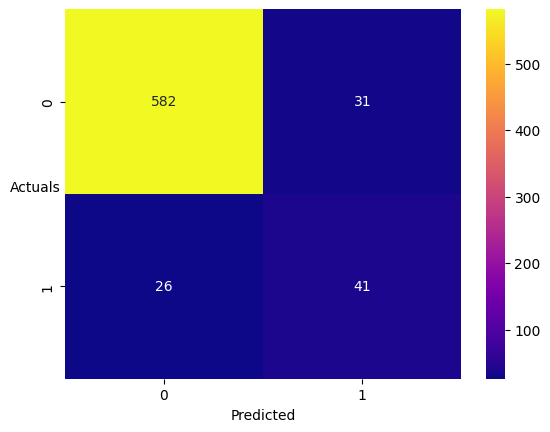

In [1463]:
sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1464]:
print(metrics.classification_report(y_test, y_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.957     0.949     0.953       613
         1.0      0.569     0.612     0.590        67

    accuracy                          0.916       680
   macro avg      0.763     0.781     0.772       680
weighted avg      0.919     0.916     0.918       680



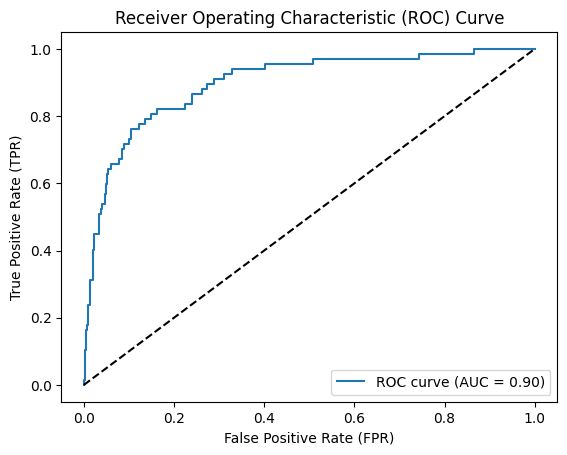

In [1465]:
from sklearn.metrics import roc_curve, auc

y_scores = lda.predict_proba(X_test)[:, 1]  # Assuming the positive class is at index 1

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [1466]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train1, y_train1)

X_train_lda = lda.transform(X_train1)

X_test_lda = lda.transform(X_test1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1467]:
y_pred = lda.predict(X_train1)

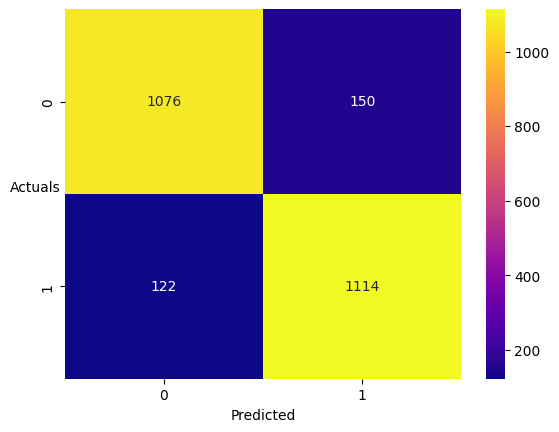

In [1468]:
sns.heatmap((metrics.confusion_matrix(y_train1,y_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1469]:
print(metrics.classification_report(y_train1, y_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.898     0.878     0.888      1226
         1.0      0.881     0.901     0.891      1236

    accuracy                          0.890      2462
   macro avg      0.890     0.889     0.889      2462
weighted avg      0.890     0.890     0.890      2462



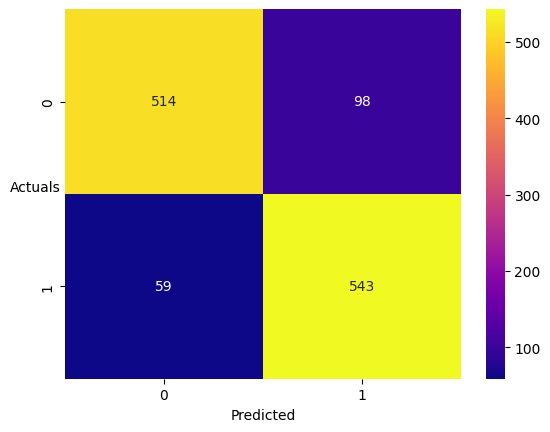

In [1470]:
y_pred = lda.predict(X_test1)
sns.heatmap((metrics.confusion_matrix(y_test1,y_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);


In [1471]:
print(metrics.classification_report(y_test1, y_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.897     0.840     0.868       612
         1.0      0.847     0.902     0.874       602

    accuracy                          0.871      1214
   macro avg      0.872     0.871     0.871      1214
weighted avg      0.872     0.871     0.871      1214



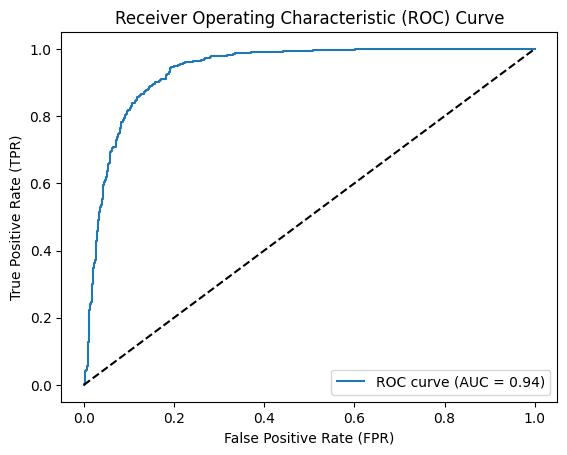

In [1472]:
from sklearn.metrics import roc_curve, auc

y_scores = lda.predict_proba(X_test1)[:, 1]  # Assuming the positive class is at index 1

fpr, tpr, thresholds = roc_curve(y_test1, y_scores)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


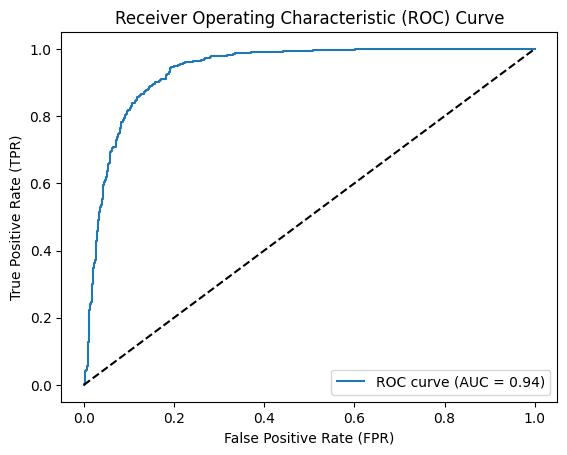

In [1473]:
from sklearn.metrics import roc_curve, auc

y_scores = lda.predict_proba(X_test1)[:, 1]  # Assuming the positive class is at index 1

fpr, tpr, thresholds = roc_curve(y_test1, y_scores)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [1474]:
df.columns

Index(['Co_Code', '_Operating_Expense_Rate',
       '_Research_and_development_expense_rate', '_Cash_flow_rate',
       '_Interest_bearing_debt_interest_rate', '_Tax_rate_A',
       '_Cash_Flow_Per_Share', '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quic

In [1475]:
X = df.drop(['Default'],axis=1)
y=df[['Default']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9252539912917271
0.9073529411764706


In [1476]:
y_pred = dTreeR.predict(X_test)


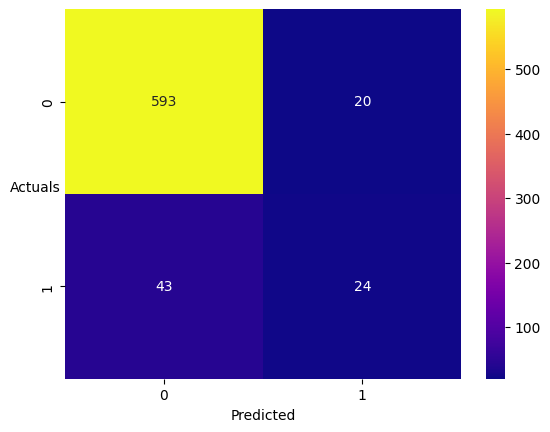

In [1477]:
sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1478]:
print(metrics.classification_report(y_test, y_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.932     0.967     0.950       613
         1.0      0.545     0.358     0.432        67

    accuracy                          0.907       680
   macro avg      0.739     0.663     0.691       680
weighted avg      0.894     0.907     0.899       680



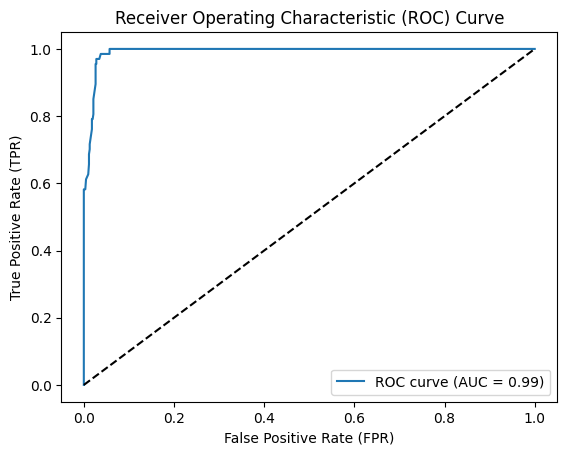

In [1479]:
from sklearn.metrics import roc_curve, auc

y_scores =model.predict_proba(X_test)[:, 1]  # Assuming the positive class is at index 1

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [1480]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_resampled1, y_resampled1,test_size=0.33,random_state=42)
dTreeR1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=42)
dTreeR1.fit(X_train1, y_train1)
print(dTreeR.score(X_train1, y_train1))
print(dTreeR.score(X_test1, y_test1))

0.6888708367181153
0.6771004942339374


In [1481]:
y_pred = model.predict(X_test1)

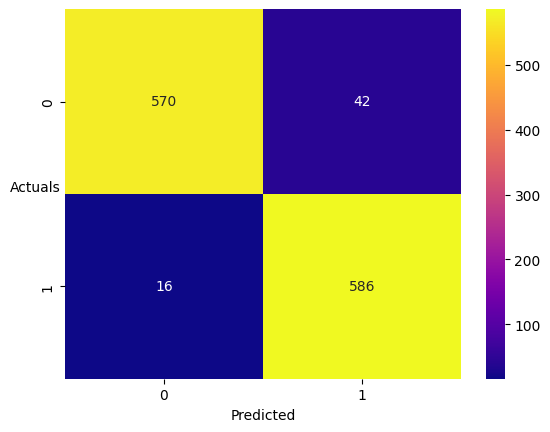

In [1482]:
sns.heatmap((metrics.confusion_matrix(y_test1,y_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1483]:
print(metrics.classification_report(y_test1, y_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.973     0.931     0.952       612
         1.0      0.933     0.973     0.953       602

    accuracy                          0.952      1214
   macro avg      0.953     0.952     0.952      1214
weighted avg      0.953     0.952     0.952      1214



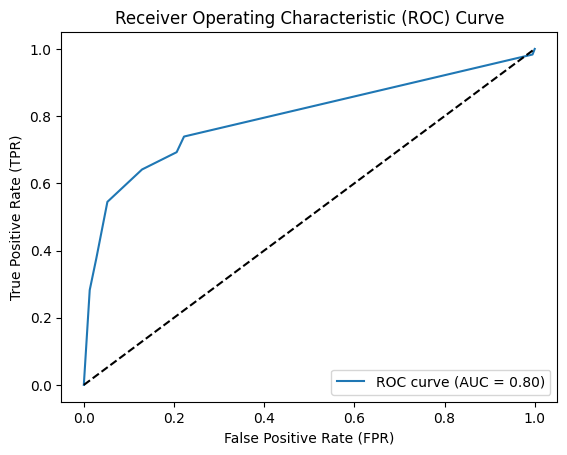

In [1484]:
from sklearn.metrics import roc_curve, auc

y_scores = dTreeR.predict_proba(X_test1)[:, 1]  # Assuming the positive class is at index 1

fpr, tpr, thresholds = roc_curve(y_test1, y_scores)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# MARKET RISK ANALYSIS

In [1485]:
df1 = pd.read_csv('/content/drive/MyDrive/great learning/Market+Risk+Dataset.csv')

In [1486]:
df1.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [1487]:
df1.shape

(314, 11)

In [1488]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [1489]:
df1.describe()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


In [1490]:
df1.isnull().sum()

Date                   0
Infosys                0
Indian Hotel           0
Mahindra & Mahindra    0
Axis Bank              0
SAIL                   0
Shree Cement           0
Sun Pharma             0
Jindal Steel           0
Idea Vodafone          0
Jet Airways            0
dtype: int64

In [1491]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have historical stock price data in CSV format for two stocks
# Read the data into pandas dataframes
stock1_data = df1[['Date','Infosys']]
stock2_data = df1[['Date','Axis Bank']]

stock1_data['Date']

# # Convert the date column to datetime format
stock1_data['Date'] = pd.to_datetime(stock1_data['Date'])
stock2_data['Date'] = pd.to_datetime(stock2_data['Date'])


<ipython-input-1491-111d32bcd7da>:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  stock1_data['Date'] = pd.to_datetime(stock1_data['Date'])
<ipython-input-1491-111d32bcd7da>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock1_data['Date'] = pd.to_datetime(stock1_data['Date'])
<ipython-input-1491-111d32bcd7da>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  stock2_data['Date'] = pd.to_datetime(stock2_data['Date'])
<ipython-input-1491-111d32bcd7da>:13: 

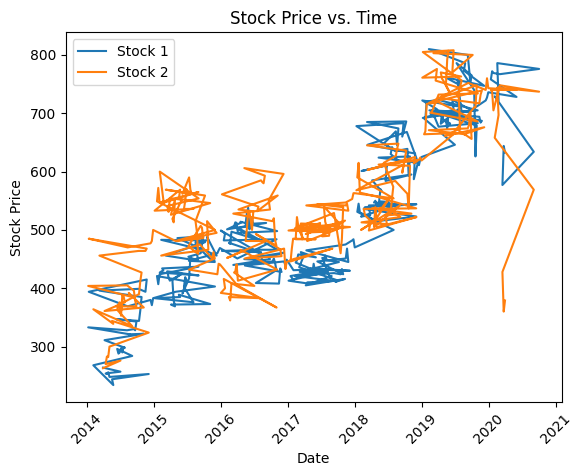

In [1492]:
# # Plotting the stock price graph
plt.plot(stock1_data['Date'], stock1_data['Infosys'], label='Stock 1')
plt.plot(stock2_data['Date'], stock2_data['Axis Bank'], label='Stock 2')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price vs. Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [1493]:
df1.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [1494]:
df1.sort_values('Date', inplace=True)
df1.reset_index(drop=True, inplace=True)

col =df1.columns.drop('Date')
stock_columns = col
df1[stock_columns] = df1[stock_columns].apply(pd.to_numeric, errors='coerce')

df1[stock_columns] = df1[stock_columns].pct_change()

print(df1)

           Date   Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  \
0    01-01-2018       NaN           NaN                  NaN        NaN   
1    01-02-2016  0.061702     -0.213740            -0.214383  -0.303730   
2    01-04-2019  0.446894      0.495146             0.115717   0.941327   
3    01-05-2017 -0.427978     -0.227273            -0.013932  -0.344284   
4    01-06-2015 -0.072639     -0.226891            -0.117739   0.068136   
..          ...       ...           ...                  ...        ...   
309  31-03-2014 -0.641304     -0.524138            -0.141509  -0.646030   
310  31-07-2017  0.704545      0.710145             0.518681   0.927757   
311  31-08-2015 -0.006667     -0.338983            -0.237337  -0.094675   
312  31-10-2016 -0.035794      0.333333             0.256167   0.030501   
313  31-12-2018  0.450116      0.365385             0.077039   0.308668   

         SAIL  Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  \
0         NaN           NaN

In [1495]:
df1

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-02-2016,0.061702,-0.213740,-0.214383,-0.303730,-0.583333,-0.454905,0.471002,-0.732218,-0.142857,-0.345580
2,01-04-2019,0.446894,0.495146,0.115717,0.941327,0.450000,0.857465,-0.454002,1.921875,-0.733333,-0.550877
3,01-05-2017,-0.427978,-0.227273,-0.013932,-0.344284,0.017241,0.005379,0.347921,-0.422460,2.062500,1.082031
4,01-06-2015,-0.072639,-0.226891,-0.117739,0.068136,0.067797,-0.420238,0.337662,-0.009259,1.163265,-0.427767
...,...,...,...,...,...,...,...,...,...,...,...
309,31-03-2014,-0.641304,-0.524138,-0.141509,-0.646030,0.446809,-0.736387,0.258503,0.732558,12.833333,7.176471
310,31-07-2017,0.704545,0.710145,0.518681,0.927757,-0.102941,2.217391,-0.108108,-0.536913,-0.325301,1.190647
311,31-08-2015,-0.006667,-0.338983,-0.237337,-0.094675,-0.245902,-0.405069,0.684848,-0.550725,0.571429,-0.487685
312,31-10-2016,-0.035794,0.333333,0.256167,0.030501,0.065217,0.563996,-0.237410,0.112903,-0.500000,0.397436


In [1501]:
df1.isnull().sum()

Date                   0
Infosys                1
Indian Hotel           1
Mahindra & Mahindra    1
Axis Bank              1
SAIL                   1
Shree Cement           1
Sun Pharma             1
Jindal Steel           1
Idea Vodafone          1
Jet Airways            1
dtype: int64

In [1502]:
df1.dropna()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
1,01-02-2016,0.061702,-0.213740,-0.214383,-0.303730,-0.583333,-0.454905,0.471002,-0.732218,-0.142857,-0.345580
2,01-04-2019,0.446894,0.495146,0.115717,0.941327,0.450000,0.857465,-0.454002,1.921875,-0.733333,-0.550877
3,01-05-2017,-0.427978,-0.227273,-0.013932,-0.344284,0.017241,0.005379,0.347921,-0.422460,2.062500,1.082031
4,01-06-2015,-0.072639,-0.226891,-0.117739,0.068136,0.067797,-0.420238,0.337662,-0.009259,1.163265,-0.427767
5,01-07-2019,0.806789,0.619565,0.122776,0.510319,-0.238095,0.921281,-0.550971,0.252336,-0.886792,-0.796721
...,...,...,...,...,...,...,...,...,...,...,...
309,31-03-2014,-0.641304,-0.524138,-0.141509,-0.646030,0.446809,-0.736387,0.258503,0.732558,12.833333,7.176471
310,31-07-2017,0.704545,0.710145,0.518681,0.927757,-0.102941,2.217391,-0.108108,-0.536913,-0.325301,1.190647
311,31-08-2015,-0.006667,-0.338983,-0.237337,-0.094675,-0.245902,-0.405069,0.684848,-0.550725,0.571429,-0.487685
312,31-10-2016,-0.035794,0.333333,0.256167,0.030501,0.065217,0.563996,-0.237410,0.112903,-0.500000,0.397436


In [1503]:

means = df1.mean()
stds = df1.std()

# Display the means
print("Means:")
print(means)

# Display the standard deviations
print("\nStandard Deviations:")
print(stds)


Means:
Infosys                0.089367
Indian Hotel           0.055496
Mahindra & Mahindra    0.034143
Axis Bank              0.054913
SAIL                   0.084312
Shree Cement           0.141462
Sun Pharma             0.087287
Jindal Steel           0.284664
Idea Vodafone          1.326411
Jet Airways            2.265375
dtype: float64

Standard Deviations:
Infosys                0.447265
Indian Hotel           0.356162
Mahindra & Mahindra    0.297060
Axis Bank              0.348576
SAIL                   0.471633
Shree Cement           0.613951
Sun Pharma             0.429224
Jindal Steel           0.998155
Idea Vodafone          3.310502
Jet Airways            6.951964
dtype: float64


<ipython-input-1503-2bb1e6154e1c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df1.mean()
<ipython-input-1503-2bb1e6154e1c>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stds = df1.std()


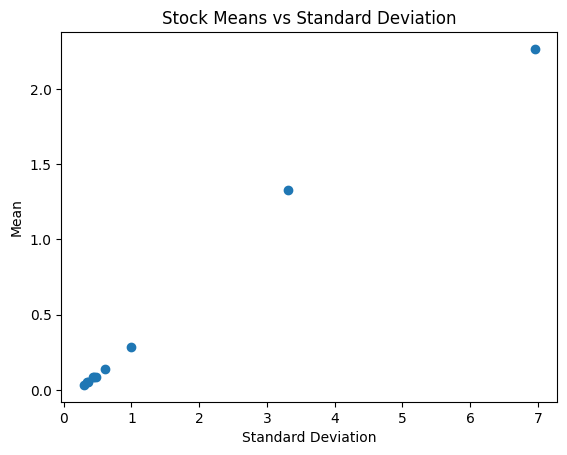

In [1504]:
# Plotting the means vs standard deviation
plt.scatter(stds, means)

# Adding labels and title
plt.xlabel('Standard Deviation')
plt.ylabel('Mean')
plt.title('Stock Means vs Standard Deviation')

# Display the plot
plt.show()


In [1515]:
volatility = np.sqrt(252) * stds

# Print the volatility
print("Historical Volatility:\n",  volatility)

Historical Volatility:
 Infosys                  7.100118
Indian Hotel             5.653904
Mahindra & Mahindra      4.715684
Axis Bank                5.533477
SAIL                     7.486948
Shree Cement             9.746178
Sun Pharma               6.813719
Jindal Steel            15.845225
Idea Vodafone           52.552596
Jet Airways            110.359006
dtype: float64


In [1508]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 314 non-null    object 
 1   Infosys              313 non-null    float64
 2   Indian Hotel         313 non-null    float64
 3   Mahindra & Mahindra  313 non-null    float64
 4   Axis Bank            313 non-null    float64
 5   SAIL                 313 non-null    float64
 6   Shree Cement         313 non-null    float64
 7   Sun Pharma           313 non-null    float64
 8   Jindal Steel         313 non-null    float64
 9   Idea Vodafone        313 non-null    float64
 10  Jet Airways          313 non-null    float64
dtypes: float64(10), object(1)
memory usage: 27.1+ KB


In [1513]:
import numpy as np
import pandas as pd

# Assuming you have a pandas DataFrame named 'df1' with columns containing the historical data

# Handling non-numeric values
df1[stock_columns] = df1[stock_columns].apply(pd.to_numeric, errors='coerce')

# Handling missing values by imputing with mean
df1[stock_columns] = df1[stock_columns].fillna(df1[stock_columns].mean())

# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Create an empty dictionary to store the VaR for each column
var_dict = {}

# Iterate over each column in the DataFrame
for column in df1.columns:
    if column != 'Date':
        # Select the column data
        data = df1[column].values.astype(float)

        # Calculate the VaR using the percentile method
        var = np.percentile(data, (1 - confidence_level) * 100)

        # Store the VaR in the dictionary
        var_dict[column] = var

# Convert the dictionary to a DataFrame for better representation
var_df = pd.DataFrame.from_dict(var_dict, orient='index', columns=['VaR'])

# Print the VaR for each column
print(var_df)


                          VaR
Infosys             -0.468595
Indian Hotel        -0.352255
Mahindra & Mahindra -0.322730
Axis Bank           -0.371856
SAIL                -0.477326
Shree Cement        -0.527002
Sun Pharma          -0.502762
Jindal Steel        -0.627884
Idea Vodafone       -0.912400
Jet Airways         -0.938910
